In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

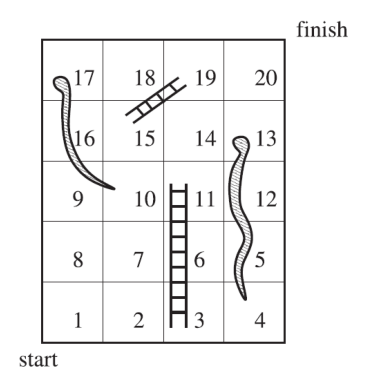

In [7]:
from PIL import Image

image = Image.open("SerpEsc.png")
plt.imshow(image)
plt.axis("off")
plt.show()

# Ejercicio:

Resolver de manera analítica y por simulación.

Las instrucciones son las tradicionales, se juega con un dado justo de 6 caras. 

Sea N el número de lanzamientos requerido para alcanzar el final del juego (llegar a la casilla final). 

Estimar el valor esperado de N, analíticamente y por simulación.

Comentar su opinión sobre el uso de la simulación para resolver este problema.

Hacer todo en una misma notebook de Jupyter, guardarla en su github y compartir aquí solamente el link.

In [16]:
import numpy as np

def play_game():
    position = 0  # Inicia en la casilla de partida.
    rolls = 0  # Contador de lanzamientos del dado.
    transitions = {3: 11, 15: 19, 13: 4, 17: 10, }  # Define las serpientes y escaleras: desde->hasta.
    
    while position < 20:  # El juego continúa mientras no se alcance o sobrepase la casilla 20.
        roll = np.random.randint(1, 7)  # Simula el lanzamiento de un dado justo de 6 caras.
        rolls += 1  # Incrementa el contador de lanzamientos.
        position += roll  # Mueve la posición del jugador según el dado.
        
        if position in transitions:
            position = transitions[position]  # Si cae en una serpiente o escalera, se mueve a la casilla correspondiente.
#         elif position > 20:   #PArte del codigo para rebote
#             position -= roll  # Si el lanzamiento sobrepasa la casilla 20, no avanza.

    return rolls  # Devuelve el total de lanzamientos necesarios para terminar el juego.

# Simulación de Monte Carlo
np.random.seed(42)  # Establece una semilla para la reproducibilidad de los resultados.
n_simulations = 10000  # Número de veces que se simulará el juego.
results = [play_game() for _ in range(n_simulations)]  # Realiza las simulaciones.

# Calculamos el promedio de los resultados
average_rolls = np.mean(results)  # Calcula el promedio de lanzamientos necesarios.
average_rolls


7.0842

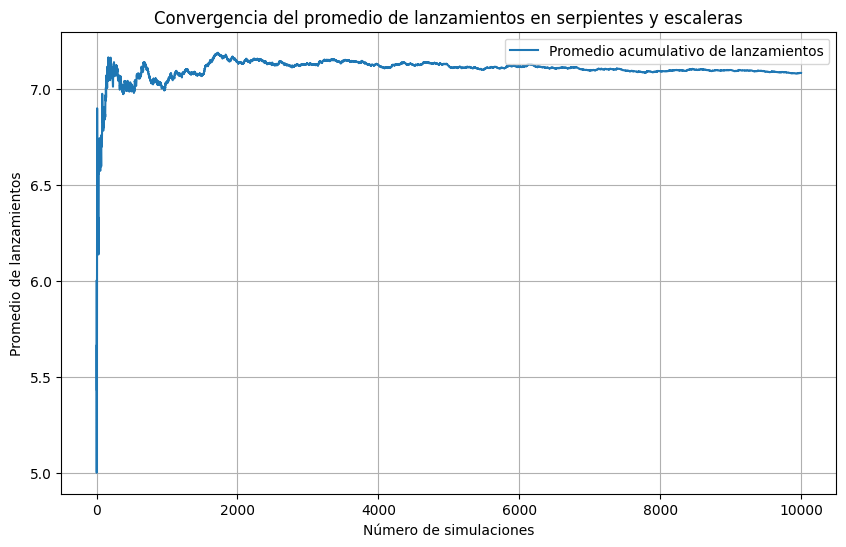

In [21]:
# Calculamos el promedio acumulativo
cumulative_averages = np.cumsum(results) / np.arange(1, len(results) + 1)

# Graficamos la convergencia del promedio de lanzamientos
plt.figure(figsize=(10, 6))
plt.plot(cumulative_averages, label='Promedio acumulativo de lanzamientos')
plt.xlabel('Número de simulaciones')
plt.ylabel('Promedio de lanzamientos')
plt.title('Convergencia del promedio de lanzamientos en serpientes y escaleras')
plt.legend()
plt.grid(True)
plt.show()